In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv ("http://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df ['Channel'].unique()

array([2, 1], dtype=int64)

In [7]:
df ['Region'].unique()

array([3, 1, 2], dtype=int64)

In [8]:
ykb = df[(df['Region']==1)]
msk = df[(df['Region']==2)]
oth = df[(df['Region']==3)]

In [9]:
milk1 = ykb['Milk'].sum()
fresh1 = ykb['Fresh'].sum()
frozen1 = ykb['Frozen'].sum()
milk2 = msk['Milk'].sum()
fresh2 = msk['Fresh'].sum()
frozen2 = msk['Frozen'].sum()
milk3 = oth['Milk'].sum()
fresh3 = oth['Fresh'].sum()
frozen3 = oth['Frozen'].sum()

In [10]:
print (milk1, ' ', fresh1, ' ', frozen1)

422454   854833   231026


In [11]:
print (milk2, ' ', fresh2, ' ', frozen2)

239144   464721   190132


In [12]:
print (milk3, ' ', fresh3, ' ', frozen3)

1888759   3960577   930492


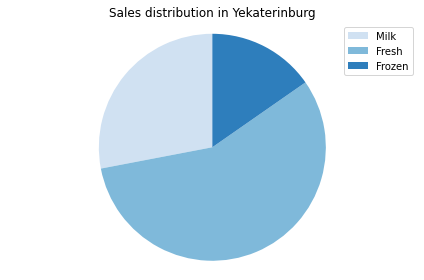

In [13]:
# make data
x = [milk1, fresh1, frozen1]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.set_title('Sales distribution in Yekaterinburg')
labels = [r'Milk',r'Fresh',r'Frozen']
patches, texts = plt.pie(x,colors=colors,startangle=90)
plt.legend(patches,labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

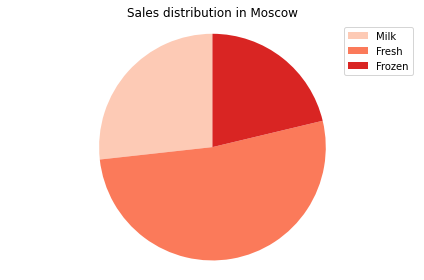

In [14]:
# make data
x = [milk2, fresh2, frozen2]
colors = plt.get_cmap('Reds')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()

ax.set_title('Sales distribution in Moscow')
labels = [r'Milk',r'Fresh',r'Frozen']
patches, texts = plt.pie(x,colors=colors,startangle=90)
plt.legend(patches,labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

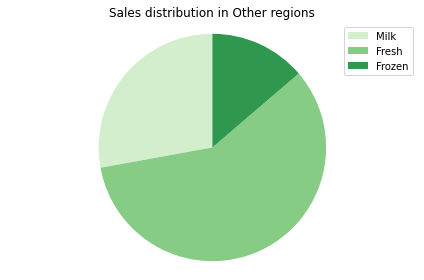

In [15]:
# make data
x = [milk3, fresh3, frozen3]
colors = plt.get_cmap('Greens')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()

ax.set_title('Sales distribution in Other regions')
labels = [r'Milk',r'Fresh',r'Frozen']
patches, texts = plt.pie(x,colors=colors,startangle=90)
plt.legend(patches,labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

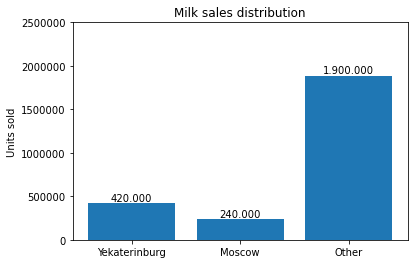

In [16]:
marks =(milk1, milk2, milk3)
regions = ('Yekaterinburg', 'Moscow', 'Other')
x_pos = np.arange (len(regions))
labels = ('420.000', '240.000', '1.900.000')
fig,ax = plt.subplots(1,1)
bars = ax.bar (regions, marks, align='center')
ax.set_ylabel('Units sold')
ax.set_title('Milk sales distribution')
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.bar_label(bars, labels)
ax.set_ylim(top=2500000)

plt.show()

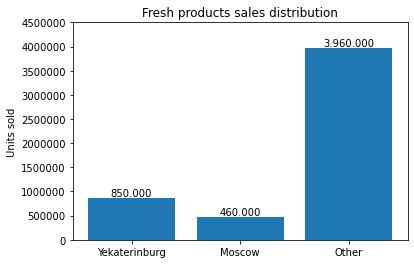

In [17]:
marks =(fresh1, fresh2, fresh3)
regions = ('Yekaterinburg', 'Moscow', 'Other')
x_pos = np.arange (len(regions))
labels = ('850.000', '460.000', '3.960.000')
fig,ax = plt.subplots(1,1)
bars = ax.bar (regions, marks, align='center')
ax.set_ylabel('Units sold')
ax.set_title('Fresh products sales distribution')
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.bar_label(bars, labels)
ax.set_ylim(top=4500000)

plt.show()

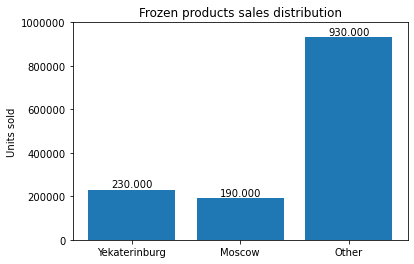

In [18]:
marks =(frozen1, frozen2, frozen3)
regions = ('Yekaterinburg', 'Moscow', 'Other')
labels = ('230.000', '190.000', '930.000')
x_pos = np.arange (len(regions))
fig,ax = plt.subplots(1,1)
bars = ax.bar (regions, marks, align='center')
ax.set_ylabel('Units sold')
ax.set_title('Frozen products sales distribution')
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.bar_label(bars, labels)
ax.set_ylim(top=1000000)

plt.show()

In [19]:
#Random forest regression

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
x = df.drop(['Region'], axis=1)
y = df['Region']
x=StandardScaler().fit_transform(x)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [77]:
regressor=RandomForestRegressor(n_estimators=10, random_state=0)

In [78]:
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [79]:
regressor.score(x_train, y_train)

0.7740705433746425

In [80]:
regressor.score(x_test, y_test)

-0.17730614143920587

In [88]:
x_new =df.drop(['Region'], axis=1).head(10)

In [89]:
print(x_new)

   Channel  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2  12669   9656     7561     214              2674        1338
1        2   7057   9810     9568    1762              3293        1776
2        2   6353   8808     7684    2405              3516        7844
3        1  13265   1196     4221    6404               507        1788
4        2  22615   5410     7198    3915              1777        5185
5        2   9413   8259     5126     666              1795        1451
6        2  12126   3199     6975     480              3140         545
7        2   7579   4956     9426    1669              3321        2566
8        1   5963   3648     6192     425              1716         750
9        2   6006  11093    18881    1159              7425        2098


In [29]:
regressor.predict(x_new)

array([3. , 2.7, 3. , 3. , 3. , 3. , 2.7, 3. , 2.5, 2.2])

In [30]:
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [31]:
#Random forest classification
from sklearn.ensemble import RandomForestClassifier
x = df.drop(['Region'], axis=1)
y = df['Region']

In [32]:
x_train, x_test, y_train, y_test =\
... train_test_split(x,y,test_size=0.33, random_state=0)

In [33]:
classifier = RandomForestClassifier(n_estimators=10, random_state=0)

In [34]:
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [35]:
classifier.score(x_train, y_train)

0.9863945578231292

In [36]:
classifier.score(x_test,y_test)

0.6917808219178082

In [37]:
x_new = x.head(10)
classifier.predict(x_new)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [ ]:
#Naive-Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gnb = GaussianNB()

In [49]:
gnb.fit(x_train, y_train)
gnb.predict(x_test)

array([1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 2, 1, 1, 1, 1, 3, 3, 2,
       3, 3, 3, 2, 3, 1, 3, 1, 1, 1, 3, 2, 3, 3, 2, 3, 1, 1, 1, 3, 1, 2,
       3, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 1, 1,
       3, 2, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 2, 1, 3, 1, 1, 1, 3, 3, 3, 2, 1, 3, 3, 2, 3, 1, 3, 3, 3,
       3, 3, 2, 1, 3, 1, 2, 2, 2, 1, 1, 3, 3, 1], dtype=int64)

In [50]:
y_test.head(10)

208    1
349    3
249    1
319    2
54     3
12     3
159    3
284    3
274    3
318    2
Name: Region, dtype: int64

In [51]:
gnb.score(x_train, y_train)

0.5136054421768708

In [52]:
gnb.score(x_test,y_test)

0.4931506849315068

In [53]:
#LinearSVC

In [82]:
from sklearn.svm import LinearSVC

In [83]:
svc_model = LinearSVC(random_state=0, max_iter=10000)

In [84]:
svc_model.fit(x_train,y_train)

LinearSVC(max_iter=10000, random_state=0)

In [86]:
svc_model.score(x_train,y_train)

0.7244897959183674

In [87]:
svc_model.score(x_test,y_test)

0.7191780821917808

In [90]:
#K-Neighbors Classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
knn = KNeighborsClassifier(n_neighbors=9)

In [134]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [135]:
knn.predict(x_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [136]:
knn.score(x_train,y_train)

0.7142857142857143

In [137]:
knn.score(x_test,y_test)

0.7123287671232876

In [138]:
#Total metrics:

In [140]:
#Random forest regression:
#Training score: 0.7740705433746425
#Test score: -0.17730614143920587

In [141]:
#Random forest classification:
#Training score: 0.9863945578231292
#Test score: 0.6917808219178082

In [142]:
#Naive-Bayes:
#Training score: 0.5136054421768708
#Test score: 0.4931506849315068

In [143]:
#LinearSVC:
#Training score: 0.7244897959183674
#Test score: 0.7191780821917808

In [144]:
#K-Neighbors classifier:
#Training score: 0.7142857142857143
#Test score: 0.7123287671232876

In [ ]:
#Top performance: Random forest classification